In [165]:
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold,KFold

In [7]:
customer_data=pd.read_csv("Customer_Data_re.csv")

c:\users\dazzabhi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
customer_data.isna().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [20]:
invoice=pd.read_csv("Final_invoice.csv")

c:\users\dazzabhi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
jtd_data=pd.read_csv("JTD.csv")

In [21]:
invoice.isna().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [24]:
invoice.columns

Index(['Unnamed: 0', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice No', 'Invoice Time',
       'Job Card No', 'JobCard Date', 'JobCard Time', 'KMs Reading',
       'Labour Total', 'Make', 'Misc Total', 'Model', 'OSL Total',
       'Order Type', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Print Status', 'Recovrbl Exp', 'Regn No', 'Total Amt Wtd Tax.',
       'User ID'],
      dtype='object')

In [14]:
invoice=invoice.dropna(axis=0,how='any')

In [22]:
columns_to_be_removed = invoice.isnull().sum()[invoice.isnull().sum().sort_values() > 15000].index

In [23]:
invoice=invoice.drop(columns=columns_to_be_removed)

In [17]:
invoice.dropna(subset=['Regn No'],inplace=True)

In [25]:
invoice['CITY']=invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']=invoice['Model'].fillna(invoice['Model'].mode()[0])

In [168]:
customer_data['Customer No.']=customer_data['Customer No.'].astype(str)

In [27]:
invoice_customer=pd.merge(invoice,customer_data,left_on='Customer No.',right_on='Customer No.',how='left')

In [29]:
invoice_customer.shape

(492314, 36)

In [62]:
columns=['Unnamed: 0','Gate Pass Time','Print Status','Recovrbl Exp']

In [31]:
file_name="Plant Master.xlsx"
plant=pd.read_excel(file_name, index_col=0)
plant=plant.reset_index()

In [32]:
len(invoice_customer.Plant.unique()),len(plant.Plant.unique())

(242, 438)

In [33]:
plant.isna().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [34]:
plant = plant.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2',
                                      'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])

In [35]:
invoice_customer_plant=pd.merge(invoice_customer,plant,how='left',left_on='Plant',right_on='Plant',on=None)

In [36]:
columns=['Unnamed: 0','Gate Pass Time','Print Status','Recovrbl Exp']
invoice_customer_plant=invoice_customer_plant.drop(columns=columns)

In [37]:
columns1=['Title', 'Name 1','Postal Code', 'City', 'State']
invoice_customer_plant_data=invoice_customer_plant.drop(columns=columns1)

In [38]:
invoice_customer_plant_data['Business Partner']=invoice_customer_plant_data['Business Partner'].fillna(invoice_customer_plant_data['Business Partner'].mode()[0])
invoice_customer_plant_data['Partner Type']=invoice_customer_plant_data['Partner Type'].ffill(axis=0,inplace=False)
invoice_customer_plant_data['Data Origin']=invoice_customer_plant_data['Data Origin'].ffill(axis=0,inplace=False)

In [39]:
jtd_data.drop(['Unnamed: 0',"Labor Value Number",'Target quantity UoM'],axis=1,inplace=True)

In [55]:
invoice_customer_plant_jtd_data=pd.merge(invoice_customer_plant_data,jtd_data,left_on='Job Card No',right_on='DBM Order',how='left')

In [56]:
invoice_customer_plant_jtd_data.dropna(how='any',axis=1,inplace=True)

In [68]:
invoice_jtd_data=invoice_customer_plant_jtd_data

In [101]:
invoice_jtd_data['Invoice Date']=pd.to_datetime(invoice_jtd_data['Invoice Date'])

In [102]:
invoice_jtd_data['Invoice Date Time']=invoice_jtd_data['Invoice Date'].astype(str).str.cat(invoice_jtd_data[['Invoice Time']].astype(str),sep=" ")

In [103]:
invoice_jtd_data['JobCard Date']=pd.to_datetime(invoice_jtd_data['JobCard Date'])

In [104]:
invoice_jtd_data['JobCard Date Time']=invoice_jtd_data['JobCard Date'].astype(str).str.cat(invoice_jtd_data[['JobCard Time']].astype(str),sep=" ")

In [105]:
invoice_jtd_data['JobCard Date Time']=pd.to_datetime(invoice_jtd_data['JobCard Date Time'])
invoice_jtd_data['Invoice Date Time']=pd.to_datetime(invoice_jtd_data['Invoice Date Time'])

In [106]:
invoice_jtd_data['Service Time']=invoice_jtd_data['Invoice Date Time']-invoice_jtd_data['JobCard Date Time']

In [107]:
invoice_jtd_data.loc[:,['Service Time']]

,Service Time
0,19 days 21:00:53
1,0 days 19:55:14
2,0 days 23:32:13
3,0 days 01:28:12
4,1 days 01:21:35
...,...
492270,0 days 05:41:46
492271,0 days 06:24:37
492272,0 days 07:16:05
492273,0 days 03:05:11


In [91]:
jtd_data.drop(columns=['Description',"Material","Order Item"])

,DBM Order,Item Category,Order Quantity,Net value
0,22385,P010,1.2,1869.87
1,23910,P002,1.0,2151.13
2,23910,P002,1.0,2552.92
3,23910,P002,1.0,20360.14
4,23910,P002,1.0,10691.63
...,...,...,...,...
5619479,962813,P001,850.0,1050.00
5619480,962813,P001,750.0,1250.00
5619481,962813,P001,42.0,223.00
5619482,962813,P001,450.0,450.00


In [92]:
jtd_data_group={'Item Category' : lambda x: str(set(x)).strip('{}').replace("'",""), 
                'Order Quantity' : lambda x : x.sum(),
                'Net value' : lambda x: x.sum()} 
jtd_data_groupby=jtd_data.groupby('DBM Order')['Item Category','Order Quantity','Net value'].agg(jtd_data_group).reset_index()

c:\users\dazzabhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [97]:
columns=['Unnamed: 0','District','Gate Pass Time','Model','Pin code', 'Plant', 'Plant Name1',
        'Regn No','User ID', ]

In [94]:
invoice.columns

Index(['Unnamed: 0', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice No', 'Invoice Time',
       'Job Card No', 'JobCard Date', 'JobCard Time', 'KMs Reading',
       'Labour Total', 'Make', 'Misc Total', 'Model', 'OSL Total',
       'Order Type', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Print Status', 'Recovrbl Exp', 'Regn No', 'Total Amt Wtd Tax.',
       'User ID'],
      dtype='object')

In [98]:
invoice_final=invoice.drop(columns=columns)

In [99]:
invoice_jtd_data=pd.merge(invoice_final,jtd_data_groupby,left_on='Job Card No',right_on='DBM Order',how="inner")

In [108]:
invoice_jtd_data['Service Category']=None
invoice_jtd_data.loc[invoice_jtd_data['Service Time']<pd.Timedelta(hours=12),'Service Category']='Super_fast'
invoice_jtd_data.loc[(invoice_jtd_data['Service Time']>pd.Timedelta(hours=12)) & (invoice_jtd_data['Service Time']<pd.Timedelta(hours=36)),'Service Category']='fast'
invoice_jtd_data.loc[(invoice_jtd_data['Service Time']>pd.Timedelta(hours=36))& (invoice_jtd_data['Service Time']<pd.Timedelta(hours=100)),'Service Category']='moderate'
invoice_jtd_data.loc[(invoice_jtd_data['Service Time']>pd.Timedelta(hours=100))& (invoice_jtd_data['Service Time']<pd.Timedelta(hours=192)),'Service Category']='slow'
invoice_jtd_data.loc[(invoice_jtd_data['Service Time']>pd.Timedelta(hours=192))& (invoice_jtd_data['Service Time']<pd.Timedelta(hours=360)),'Service Category']='Super_slow'
invoice_jtd_data.loc[invoice_jtd_data['Service Time']>pd.Timedelta(hours=360),'Service Category']='Default'

In [109]:
most_freq_order_type=['Paid Service','Running Repairs',"Accidental","SMC Value Package"]

In [110]:
invoice_jtd_data["Order Type"]=invoice_jtd_data['Order Type'].apply(lambda x: 'others' if x not in most_freq_order_type else x)

In [111]:
most_freq_order_type=['Paid Service','Running Repairs',"Accidental","SMC Value Package"]

In [112]:
((invoice_jtd_data['Order Type'].value_counts())/(len(invoice_jtd_data['Order Type'])))*100

Running Repairs      54.733635
Paid Service         27.422680
Accidental            8.967549
others                6.889239
SMC Value Package     1.986898
Name: Order Type, dtype: float64

In [113]:
most_freq_city=((invoice_jtd_data['CITY'].value_counts())/(len(invoice_jtd_data['CITY']))).iloc[0:6].index

In [114]:
invoice_jtd_data['CITY']=invoice_jtd_data['CITY'].apply(lambda x: 'others' if x not in most_freq_city else x)

In [115]:
(((invoice_jtd_data['CITY'].value_counts())/(len(invoice_jtd_data['CITY'])))*100).head(10)

others       80.758113
CHENNAI       5.837185
PUNE          4.070489
HYDERABAD     2.869534
NASIK         2.446803
NAGPUR        2.027322
NASHIK        1.990554
Name: CITY, dtype: float64

In [116]:
most_freq_item_category=(((invoice_jtd_data['Item Category'].value_counts())/(len(invoice_jtd_data['Item Category'])))*100)[(((invoice_jtd_data['Item Category'].value_counts())/(len(invoice_jtd_data['Item Category'])))*100)>5].index
most_freq_item_category

Index(['P002, P001', 'P001', 'P002, P001, P011'], dtype='object')

In [117]:
invoice_jtd_data.columns

Index(['CITY', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'OSL Total',
       'Order Type', 'Parts Total', 'Print Status', 'Recovrbl Exp',
       'Total Amt Wtd Tax.', 'DBM Order', 'Item Category', 'Order Quantity',
       'Net value', 'Invoice Date Time', 'JobCard Date Time', 'Service Time',
       'Service Category'],
      dtype='object')

In [118]:
invoice_jtd_data['Item Category']=invoice_jtd_data['Item Category'].apply(lambda x: 'others' if x not in most_freq_item_category else x)

In [119]:
invoice_jtd_data['Item Category'].value_counts()/len(invoice_jtd_data)

P002, P001          0.328824
others              0.294275
P001                0.270016
P002, P001, P011    0.106885
Name: Item Category, dtype: float64

In [120]:
most_freq_car=((invoice_jtd_data['Make'].value_counts()/len(invoice_jtd_data["Make"])*100))[((invoice_jtd_data['Make'].value_counts()/len(invoice_jtd_data["Make"])*100))>2].index
most_freq_car

Index(['MARUTI SUZUKI', 'MAHINDRA &  MAHINDRA', 'HYUNDAI', 'TATA MOTORS',
       'GENERAL MOTORS', 'FORD', 'TOYOTA', 'HONDA'],
      dtype='object')

In [121]:
invoice_jtd_data['Make']=invoice_jtd_data["Make"].apply(lambda x:'others' if x not in most_freq_car else x)

In [122]:
invoice_jtd_data['Make'].value_counts()/len(invoice_jtd_data["Make"])*100

MARUTI SUZUKI           29.880656
MAHINDRA &  MAHINDRA    17.742522
HYUNDAI                 17.335026
TATA MOTORS             11.788127
GENERAL MOTORS           5.909502
others                   5.857701
FORD                     4.391042
TOYOTA                   3.954091
HONDA                    3.141334
Name: Make, dtype: float64

In [123]:
most_freq_serice_category=(invoice_jtd_data['Service Category'].value_counts()/len(invoice_jtd_data["Service Category"])*100)[((invoice_jtd_data['Service Category'].value_counts()/len(invoice_jtd_data["Service Category"])*100))>11].index
most_freq_serice_category

Index(['Super_fast', 'fast', 'moderate'], dtype='object')

In [124]:
invoice_jtd_data['Service Category']=invoice_jtd_data['Service Category'].apply(lambda x:'others' if x not in most_freq_serice_category else x)

In [125]:
invoice_jtd_data['Service Category'].value_counts()/len(invoice_jtd_data["Service Category"])*100

Super_fast    51.293891
others        17.104667
fast          16.039003
moderate      15.562440
Name: Service Category, dtype: float64

In [127]:
dic={'Invoice Date':lambda date: (date.max()-date.min()).days,
        'Invoice No': lambda x: len(x),
        'Order Quantity': lambda x: x.sum(),
        'Net value' : lambda y: y.sum()}
invoice_group=invoice_jtd_data.groupby('Customer No.')['Invoice Date','Invoice No','Order Quantity','Net value'].agg(dic).rename(columns={'Invoice Date':'num_days','Invoice No':'num_freq'})

c:\users\dazzabhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [128]:
invoice_group['avg_order_value']=invoice_group['Net value']/invoice_group['num_freq']

In [129]:
repair_freq=sum(invoice_group['num_freq'])/invoice_group.shape[0]
repeat_rate=invoice_group[invoice_group['num_freq']>1].shape[0]/invoice_group.shape[0]
churn_rate=(1-repeat_rate)

In [130]:
repair_freq,repeat_rate,churn_rate

(1.9421507166556857, 0.3753397851413782, 0.6246602148586218)

In [133]:
invoice_group['profit_margin']=invoice_group['Net value']*0.05

In [134]:
invoice_group['CLV']=((invoice_group['avg_order_value']*repair_freq)/(churn_rate))

In [137]:
invoice_group['customer_lifetime_val']=((invoice_group['CLV']*invoice_group['profit_margin']).astype(np.int64)).astype(float)

62.47

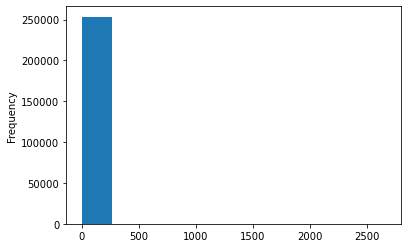

In [138]:
invoice_group['num_freq'].plot(kind='hist',bins=10)

one_time= round(((sum(invoice_group['num_freq']==1)/len(invoice_group))*(100)),2)
one_time

In [139]:
invoice_jtd_data=pd.get_dummies(invoice_jtd_data,columns=['Order Type','Item Category','Make','Service Category','Cust Type','CITY'])

In [141]:
final_group=invoice_jtd_data.groupby('Customer No.')['Make_FORD', 'Make_GENERAL MOTORS', 'Make_HONDA', 'Make_HYUNDAI',
       'Make_MAHINDRA &  MAHINDRA', 'Make_MARUTI SUZUKI', 'Make_TATA MOTORS',
       'Make_TOYOTA', 'Make_others','Order Type_Accidental', 'Order Type_Paid Service',
       'Order Type_Running Repairs', 'Order Type_SMC Value Package',
       'Order Type_others', 'Item Category_P001', 'Item Category_P002, P001',
       'Item Category_P002, P001, P011',
        'Item Category_others','Service Category_Super_fast',
       'Service Category_fast', 'Service Category_moderate',
       'Service Category_others','Order Type_Accidental', 'Order Type_Paid Service',
       'Order Type_Running Repairs', 'Order Type_SMC Value Package',
       'Order Type_others','Cust Type_Corporate others',
       'Cust Type_Corporate- M&M', 'Cust Type_Fleets', 'Cust Type_Franchise',
       'Cust Type_Insurance', 'Cust Type_MFCWL', 'Cust Type_Retail','CITY_CHENNAI', 'CITY_HYDERABAD', 'CITY_NAGPUR', 'CITY_NASHIK',
       'CITY_NASIK', 'CITY_PUNE', 'CITY_others'].max()

c:\users\dazzabhi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [142]:
dataset=pd.merge(invoice_group,final_group,on='Customer No.',how='inner')

In [143]:
dataset

,num_days,num_freq,Order Quantity,Net value,avg_order_value,profit_margin,CLV,customer_lifetime_val,Make_FORD,Make_GENERAL MOTORS,...,Cust Type_Insurance,Cust Type_MFCWL,Cust Type_Retail,CITY_CHENNAI,CITY_HYDERABAD,CITY_NAGPUR,CITY_NASHIK,CITY_NASIK,CITY_PUNE,CITY_others
Customer No.,,,,,,,,,,,,,,,,,,,,,
1,325,4,0.00,0.00,0.000000,0.0000,0.000000,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
10,439,5,377.40,11105.56,2221.112000,555.2780,6905.729163,3834599.0,0,1,...,0,0,1,0,0,0,0,0,0,1
100,156,2,9967.70,20799.74,10399.870000,1039.9870,32334.562844,33627525.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1000,883,6,300.70,8813.44,1468.906667,440.6720,4567.023908,2012559.0,0,0,...,0,0,1,0,0,0,0,0,1,0
10000,922,7,455.12,1735.52,247.931429,86.7760,770.851401,66891.0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLX241,0,1,2.00,3477.37,3477.370000,173.8685,10811.600414,1879796.0,0,0,...,0,0,0,0,0,0,0,0,0,1
PLX277,0,1,5.00,6870.95,6870.950000,343.5475,21362.686704,7339097.0,0,0,...,0,0,1,0,0,0,0,0,0,1
PLX312,0,1,32.00,567.80,567.800000,28.3900,1765.364835,50118.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [144]:
invoice_group=invoice_group.reset_index()

In [146]:
dataset=invoice_group.to_csv("preprocess4.csv")

In [838]:
invoice_group=invoice_group.drop(columns=['index','customer_lifetime_val', 'repair_freq', 'repeat_rate', 'CLV',
       'profit_margin1','avg'])

In [147]:
invoice_jtd_data['YEAR'] = invoice_jtd_data['Invoice Date'].apply(lambda x: x.strftime('%Y'))

In [148]:
sale=invoice_jtd_data.pivot_table(index=['Customer No.'],columns=['YEAR'],values='Total Amt Wtd Tax.',aggfunc='sum',fill_value=0).reset_index()

In [149]:
sale.head()

YEAR,Customer No.,2012,2013,2014,2015,2016
0,1,0.00,0.00,0.00,0.00,0.0
1,10,6161.89,4943.67,0.00,0.00,0.0
2,100,20799.74,0.00,0.00,0.00,0.0
3,1000,2817.57,2730.26,3265.61,0.00,0.0
4,10000,0.00,548.27,1001.29,185.96,0.0


In [150]:
vec=invoice_group[['Customer No.','CLV']]

In [151]:
final_sale=pd.merge(sale,vec,how='inner',on='Customer No.')

In [152]:
final_sale.head

<bound method NDFrame.head of        Customer No.      2012     2013     2014    2015     2016           CLV
0                 1      0.00     0.00     0.00    0.00     0.00      0.000000
1                10   6161.89  4943.67     0.00    0.00     0.00   6905.729163
2               100  20799.74     0.00     0.00    0.00     0.00  32334.562844
3              1000   2817.57  2730.26  3265.61    0.00     0.00   4567.023908
4             10000      0.00   548.27  1001.29  185.96     0.00    770.851401
...             ...       ...      ...      ...     ...      ...           ...
253464       PLX241      0.00     0.00     0.00    0.00  3477.37  10811.600414
253465       PLX277      0.00     0.00     0.00    0.00  6870.95  21362.686704
253466       PLX312      0.00     0.00     0.00    0.00   567.80   1765.364835
253467       PLX380      0.00     0.00     0.00    0.00  4346.98  13515.332210
253468       PLX386      0.00     0.00     0.00    0.00     0.00      0.000000

[253469 rows x 7 colu

In [156]:
final_sale['CLV']=final_sale.iloc[:,2:].sum(axis=1)

X=final_sale[['2012','2013','2014','2015','2016']]
y=final_sale[['CLV']]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.2)

# instantiate linearreg 
linreg = LinearRegression()

# fit the model to the training data 
linreg.fit(X_train, y_train)

# make predictions 
y_pred = linreg.predict(X_test)

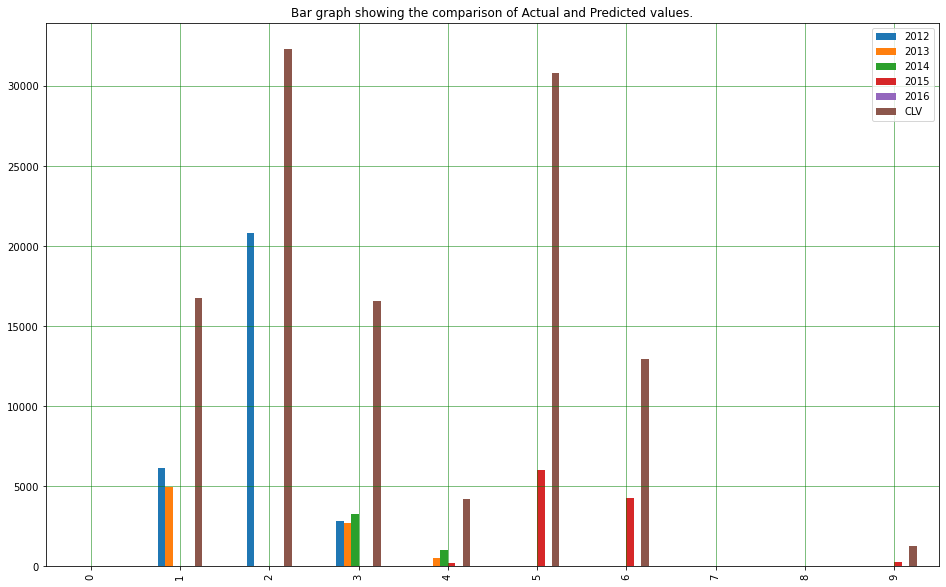

In [216]:
df1 = final_sale.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Bar graph showing the comparison of Actual and Predicted values.')
plt.show()

In [217]:
y_pred = linreg.predict(X_test)
y_pred

array([[ 9888.69286651],
       [11743.10941476],
       [ 6842.38114687],
       ...,
       [ 7724.76173722],
       [55245.83941097],
       [16875.52104726]])

In [218]:
print("Training score: "+str(linreg.score(X_train, y_train)))
print("Test score: "+str(linreg.score(X_test, y_test)))

Training score: 0.8733613725442733
Test score: 0.875118702588844


In [219]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.875118702588844
734081811.9827247
27093.944193910284


In [167]:
regressor=XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [168]:
#Hyperparameter optimization
n_estimators=[10,100,200,300]
max_depth=[2,3,5,10,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
colsample_bytree=[0.25,0.50,1]
colsample_bylevel=[0.25,0.50,1]
base_score=[0.25,0.5,0.75,1]

#Define the grid-hyperparameters to search
hyperparameter_grid={
        'n_estimators':n_estimators,
        'max_depth':max_depth,
        'booster':booster,
        'learning_rate':learning_rate,
        'min_child_weight':min_child_weight,
        'colsample_bytree':colsample_bytree,
        'colsample_bylevel':colsample_bylevel,
        'base_score':base_score
         }

In [169]:
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv=KFold(n_splits=5, random_state=None, shuffle=False)


In [170]:
random_cv=RandomizedSearchCV(estimator=regressor,
                            param_distributions=hyperparameter_grid,
                            cv=5,n_iter=50,scoring='r2',n_jobs=4,
                            verbose=5,return_train_score=True,
                             random_state=42)

In [171]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 19.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 30.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=1, booster='gbtree',
                                          colsample_bylevel=0.5,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=10, min_child_weight=4,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jo...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                      

In [172]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [220]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [221]:
y_pred1=regressor.predict(X_test)

In [222]:
print("Training score: "+str(regressor.score(X_train, y_train)))
print("Test score: "+str(regressor.score(X_test, y_test)))

Training score: 0.9522642189746378
Test score: 0.9249793923556172


In [223]:
print(metrics.r2_score(y_test, y_pred1))
print(metrics.mean_squared_error(y_test, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

0.9249793923556172
440988880.9396201
20999.735258798384


In [196]:
y_pred1=pd.DataFrame(data=y_pred1)

In [208]:
prediction=pd.concat([y_test.reset_index(),y_pred1.reset_index()],axis=1)

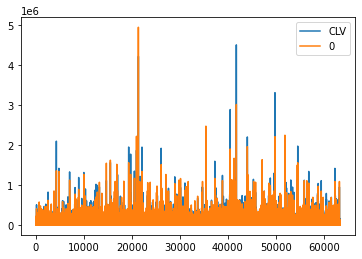

In [213]:
prediction[['CLV',0]].plot()

In [183]:
y_pred1=y_pred1.reshape(-1,1)